# Ejercicio de programación Regresión Lineal

In [362]:
# utilizado para manejos de directorios y rutas
import os

# Computacion vectorial y cientifica para python
import numpy as np

# Librerias para graficación (trazado de gráficos)
from matplotlib import pyplot
from mpl_toolkits.mplot3d import Axes3D  # Necesario para graficar superficies 3D

# llama a matplotlib a embeber graficas dentro de los cuadernillos
%matplotlib inline

## 1 Regresión lineal con una variable

El archivo `Data/ex1data1.txt` contiene el dataset para el problema de regresion lineal. La primera columna es la problacion de una ciudad (en 10,000s) y la segunda columna es el beneficio que genera un camion de comida en esa ciudad (en $10,000s). Un valor negativo indica una perdida.

In [364]:
# Leer datos separados por una coma
# data = np.loadtxt('ex1data1.txt', delimiter=',')
# data = np.loadtxt(os.path.join('data', 'ex1data1.txt'), delimiter=',')
data = np.loadtxt('../Datasets/Ice_Cream.csv', delimiter=',', skiprows=1)
X, y = data[:, 0], data[:, 1]

m = y.size  # m = numero de ejemplos de entrenamiento

In [365]:
print(X)

[24.6 26.1 27.8 20.6 11.6 14.4 13.8 30.9  1.  31.7 11.5  3.7 18.9 13.7
 39.6 18.5 26.  42.6 29.6 21.8 25.5 15.3 22.7 16.3 23.9 19.  15.7 29.2
 19.1 35.2 24.2 15.3  8.8 18.3 35.7 37.1 22.3 17.6 31.8 17.1 23.1  8.8
 18.8 14.2 18.7 15.7 21.  30.7 20.5 31.3  6.4 27.2 28.7 28.  10.4 27.4
 33.3 36.6 12.5 14.4 16.4 11.6 33.6  4.  20.6  6.6 19.9 11.7 21.5 18.8
 12.7 27.9 27.  27.4 24.2 28.8 40.5 25.6 28.8 29.5 16.1 14.8 22.2 29.1
 29.3 16.4 27.8 13.4 29.4 14.4 30.5  9.1 23.1  8.6 12.4  9.1 20.3 19.4
 14.7 10.  20.  32.1 14.3 17.7 26.6 17.3 23.8 15.6 28.5 27.8 25.5 18.5
 24.3 31.7 17.7 31.9 26.  29.4 11.1 25.5 23.  13.  28.3 30.6 12.6 19.1
 16.  26.2 31.5 32.3 21.7 20.5 19.5 20.2  6.1 22.9 24.6 28.6 19.8 12.5
 36.8 19.7 32.5 19.3 19.8  8.7 29.5 19.3 24.7 12.5 24.6 12.3 12.3 19.8
 23.4 21.2 18.9 28.3 16.5 29.  10.3 11.1 25.5 28.  28.5 13.4 26.  32.9
 32.8 32.2 24.8 15.1 23.5 35.3 16.4 20.6 21.4 27.  22.7 33.3  9.  26.9
 21.4 22.1 29.2 16.2 35.4 11.2 16.6 30.4 13.  19.9 21.  23.6 16.6 30.7
  9.9 

In [366]:
print(y)

[ 535.  626.  661.  488.  317.  368.  309.  697.   56.  738.  326.   72.
  468.  290.  906.  470.  649.  922.  650.  535.  613.  354.  525.  375.
  524.  474.  403.  680.  518.  810.  529.  357.  238.  419.  810.  871.
  551.  406.  741.  502.  540.  243.  422.  359.  468.  397.  501.  652.
  452.  698.  191.  622.  667.  629.  220.  624.  750.  828.  304.  352.
  382.  322.  775.  132.  499.  196.  497.  285.  484.  431.  277.  628.
  644.  624.  587.  654.  919.  592.  652.  683.  373.  382.  516.  686.
  655.  407.  644.  345.  643.  362.  705.  223.  544.  222.  338.  213.
  475.  461.  344.  284.  469.  712.  323.  402.  628.  416.  554.  363.
  644.  652.  604.  428.  566.  734.  386.  690.  573.  720.  307.  597.
  541.  342.  656.  703.  320.  451.  383.  675.  732.  752.  497.  418.
  449.  478.  159.  517.  600.  657.  508.  280.  842.  484.  740.  487.
  457.  242.  619.  447.  604.  275.  532.  298.  320.  494.  587.  498.
  477.  626.  391.  676.  274.  281.  584.  649.  7

### 1.1 Trazar los datos

In [368]:
def plotData(x, y):
    #Grafica los puntos x e y en una figura nueva.

    fig = pyplot.figure()  # abre una nueva figura

    pyplot.plot(x, y, 'ro', ms=10, mec='k')
    pyplot.ylabel('Ingresos en $')
    pyplot.xlabel('Grados de temperatura en °C')


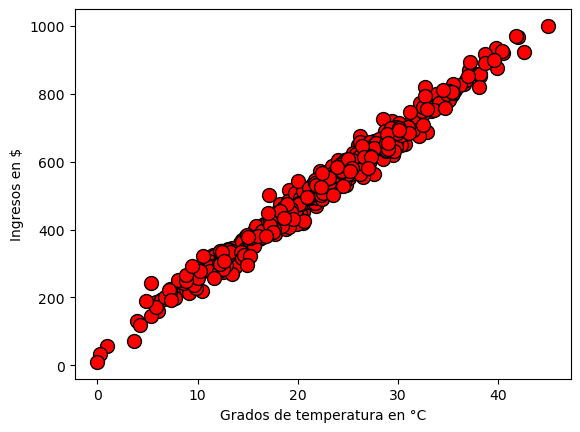

In [369]:
plotData(X, y)

In [370]:
# ?pyplot.plot

# <a id="section2"></a>
### 1.2 Descenso por el gradiente

#### 1.2.1 Ecuaciones de actualización

El objetivo de la regresion lineal es minimizar la funcion de costo

$$ J(\theta) = \frac{1}{2m} \sum_{i=1}^m \left( h_{\theta}(x^{(i)}) - y^{(i)}\right)^2$$

donde la hipotesis $h_\theta(x)$ esta dada por el modelo lineal
$$ h_\theta(x) = \theta^Tx = \theta_0 + \theta_1 x_1$$

Los parametros del modelo son los valores $\theta_j$. Estos son los valores que se ajustaran al costo minimo $J(\theta)$. Un camino para lograr esto es usar el algoritmo por lotes del descenso por el gradiente. En el descenso por el gradiente por lotes, cada iteracion ejecuta una actualizacion
$$ \theta_j = \theta_j - \alpha \frac{1}{m} \sum_{i=1}^m \left( h_\theta(x^{(i)}) - y^{(i)}\right)x_j^{(i)} \qquad \text{actualizacion simultanea } \theta_j \text{ for all } j$$

Con cada paso del descenso por el gradiente, los parametros $\theta_j$ son mas cercanos a los valores optimos que permitiran lograr el costo mas bajo J($\theta$).

#### 1.2.2 Implementación

In [372]:
# Agrega una columna de unos a X. La funcion stack de numpy une matrices a lo largo de un eje dado.
# El primer eje (eje = 0) se refiere a filas (ejemplos de entrenamiento)
# y el segundo eje (eje = 1) se refiere a columnas (características).

X = np.stack([np.ones(m), X], axis=1)

In [373]:
print(X)

[[ 1.  24.6]
 [ 1.  26.1]
 [ 1.  27.8]
 [ 1.  20.6]
 [ 1.  11.6]
 [ 1.  14.4]
 [ 1.  13.8]
 [ 1.  30.9]
 [ 1.   1. ]
 [ 1.  31.7]
 [ 1.  11.5]
 [ 1.   3.7]
 [ 1.  18.9]
 [ 1.  13.7]
 [ 1.  39.6]
 [ 1.  18.5]
 [ 1.  26. ]
 [ 1.  42.6]
 [ 1.  29.6]
 [ 1.  21.8]
 [ 1.  25.5]
 [ 1.  15.3]
 [ 1.  22.7]
 [ 1.  16.3]
 [ 1.  23.9]
 [ 1.  19. ]
 [ 1.  15.7]
 [ 1.  29.2]
 [ 1.  19.1]
 [ 1.  35.2]
 [ 1.  24.2]
 [ 1.  15.3]
 [ 1.   8.8]
 [ 1.  18.3]
 [ 1.  35.7]
 [ 1.  37.1]
 [ 1.  22.3]
 [ 1.  17.6]
 [ 1.  31.8]
 [ 1.  17.1]
 [ 1.  23.1]
 [ 1.   8.8]
 [ 1.  18.8]
 [ 1.  14.2]
 [ 1.  18.7]
 [ 1.  15.7]
 [ 1.  21. ]
 [ 1.  30.7]
 [ 1.  20.5]
 [ 1.  31.3]
 [ 1.   6.4]
 [ 1.  27.2]
 [ 1.  28.7]
 [ 1.  28. ]
 [ 1.  10.4]
 [ 1.  27.4]
 [ 1.  33.3]
 [ 1.  36.6]
 [ 1.  12.5]
 [ 1.  14.4]
 [ 1.  16.4]
 [ 1.  11.6]
 [ 1.  33.6]
 [ 1.   4. ]
 [ 1.  20.6]
 [ 1.   6.6]
 [ 1.  19.9]
 [ 1.  11.7]
 [ 1.  21.5]
 [ 1.  18.8]
 [ 1.  12.7]
 [ 1.  27.9]
 [ 1.  27. ]
 [ 1.  27.4]
 [ 1.  24.2]
 [ 1.  28.8]
 [ 1.  40.5]

<a id="section2"></a>
#### 1.2.3 Cálculo del costo $J(\theta)$

In [375]:
def calcularCosto(X, y, theta):
    # inicializa algunos valores importantes
    m = y.size  # numero de ejemplos de entrenamiento

    J = 0
    # h = np.dot(X, theta)
    J = (1/(2 * m)) * np.sum(np.square(np.dot(X, theta) - y))
    return J

Ejemplo de funcionamiento de la funcion computeCoste con dos valores diferentes de $\theta$.

In [377]:
J = calcularCosto(X, y, theta=np.array([0.0, 0.0]))
print('Con theta = [0, 0] \n Costo calculado = %.2f' % J)
# print('Valor de costo esperado (aproximadamente) 32.07\n')

# pruebas adicionales de la función de costes
J = calcularCosto(X, y, theta=np.array([0.5, 0.5]))
print('Con theta = [0.5, 0.5]\n Costo calculado = %.2f' % J)
# print('Valor de costo esperado (aproximadamente)  54.24')

J = calcularCosto(X, y, theta=np.array([0.6, 0.6]))
print('Con theta = [0.6, 0.6]\n Costo calculado = %.2f' % J)

J = calcularCosto(X, y, theta=np.array([0.7, 0.7]))
print('Con theta = [0.7, 0.7]\n Costo calculado = %.2f' % J)

J = calcularCosto(X, y, theta=np.array([0.8, 0.8]))
print('Con theta = [0.8, 0.8]\n Costo calculado = %.2f' % J)

J = calcularCosto(X, y, theta=np.array([0.75, 0.75]))
print('Con theta = [0.75, 0.75]\n Costo calculado = %.2f' % J)

Con theta = [0, 0] 
 Costo calculado = 151625.91
Con theta = [0.5, 0.5]
 Costo calculado = 144923.09
Con theta = [0.6, 0.6]
 Costo calculado = 143600.75
Con theta = [0.7, 0.7]
 Costo calculado = 142284.49
Con theta = [0.8, 0.8]
 Costo calculado = 140974.30
Con theta = [0.75, 0.75]
 Costo calculado = 141628.64


<a id="section3"></a>
#### 1.2.4 Descenso por el gradiente

El costo $J(\theta)$ esta parametrizado por el vector $\theta$, no $X$ y $y$. Donde hay que minimizar el valor de $J(\theta)$ cambiando los valores del vector $\theta$. Una buena manera de verificar si el descenso por el gradiente esta trabajando correctamente es ver los valores de $J(\theta)$ y verificar si estos decresen en cada paso.

<div class="alert alert-box alert-warning">
**Vectores y matrices en `numpy`** - Importantes notas para implementación
Un vector en `numpy` es un array de una diemension, por ejemplo `np.array([1, 2, 3])` es un vector. Una matriz en `numpy` is un arreglo de dos dimensiones, por ejemplo  `np.array([[1, 2, 3], [4, 5, 6]])`. Sin embargo, lo siguiente todavía se considera una matriz `np.array ([[1, 2, 3]])` ya que tiene dos dimensiones, incluso si tiene una forma de 1x3 (que parece un vector).

In [379]:
def gradientDescent(X, y, theta, alpha, num_iters):
        # Inicializa algunos valores importantes
    m = y.shape[0]  # numero de ejemplos de entrenamiento

    # hace una copia de theta, para evitar cambiar la matriz original,
    # ya que las matrices numpy se pasan por referencia a las funciones

    theta = theta.copy()

    J_history = [] # Lista que se utiliza para almacenar el costo en cada iteración

    for i in range(num_iters):
        theta = theta - (alpha / m) * (np.dot(X, theta) - y).dot(X)
        # save the cost J in every iteration
        J_history.append(calcularCosto(X, y, theta))

    return theta, J_history

Se inicializan los parametros $\theta$ con 0 y la taza de aprendizaje $\alpha$ con 0.01.

In [381]:
# inicializa los parametros de ajuste
theta = np.zeros(2)

# configuraciones para el descenso por el gradiente
iterations = 50
alpha = 0.001

theta, J_history = gradientDescent(X ,y, theta, alpha, iterations)
print('Theta encontrada por descenso gradiente: {:.4f}, {:.4f}'.format(*theta))
print(J_history)

Theta encontrada por descenso gradiente: 1.1701, 23.1524
[29322.887553290377, 5944.687241561091, 1475.9319889282374, 621.7104222365989, 458.40568569061026, 427.1694596780376, 421.1780871533475, 420.01226415763693, 419.76884801826196, 419.7017544038449, 419.6683695593357, 419.6414329151919, 419.6157336221535, 419.5902756271301, 419.5648685338175, 419.5394759469191, 419.51409090837615, 419.48871208704776, 419.46333922737654, 419.43797227940286, 419.4126112324672, 419.38725608342287, 419.3619068305581, 419.3365634724382, 419.31122600767924, 419.28589443490876, 419.260568752756, 419.23524895985145, 419.2099350548247, 419.1846270363076, 419.1593249029309, 419.1340286533256, 419.1087382861238, 419.083453799958, 419.05817519346056, 419.03290246526353, 419.00763561400095, 418.98237463830486, 418.95711953681024, 418.93187030815096, 418.9066269509604, 418.8813894638739, 418.8561578455266, 418.8309320945536, 418.8057122095897, 418.7804981892721, 418.75529003223636, 418.73008773711916, 418.7048913

Se utilizan los parametros finales para grafical la linea.

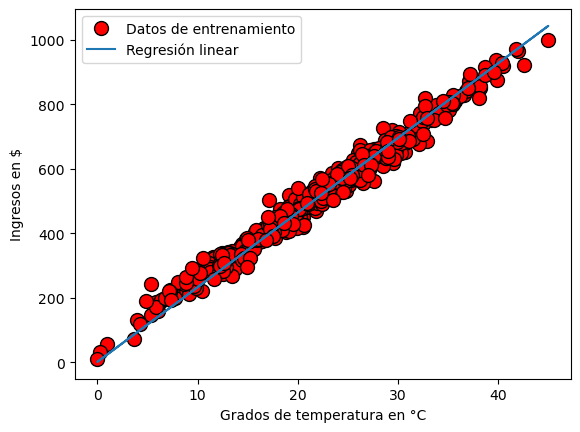

In [383]:
# grafica la linea de ajuste
plotData(X[:, 1], y)
pyplot.plot(X[:, 1], np.dot(X, theta), '-')
pyplot.legend(['Datos de entrenamiento', 'Regresión linear']);

Los valores finales de $\theta$ se utilizaran para realizar predicciones.

In [385]:
# Predecir valores de ingresos para temperatura abiental de 28°C y 35°C
predict1 = np.dot([1, 28], theta)
print('Para unatemperatura ambiental = 28°C, se predice ingresos de {:.2f}$\n'.format(predict1))

predict2 = np.dot([1, 35], theta)
print('Para unatemperatura ambiental = 35°C, se predice ingresos de {:.2f}$\n'.format(predict2))

Para unatemperatura ambiental = 28°C, se predice ingresos de 649.44$

Para unatemperatura ambiental = 35°C, se predice ingresos de 811.51$



### 1.4 Visualizar $J(\theta)$

Para comprender mejor la función de costo $J(\theta)$, se graficará la funcion de costo en 2 dimenciones con los valores de $\theta_0$ y $\theta_1$.

El proposito de graficar el costo para observar como $J(\theta)$ varia con cambios en $\theta_0$ y $\theta_1$. La función de costo  $J(\theta)$ tiene forma de una cuenca con un minimo global. (Esto es mas facil observar en los contornos de una superficie 3D). El minimo es el punto optimo para $\theta_0$ y $\theta_1$, en cada paso del descenso por el gradiente se mueve mas cerca a este punto.

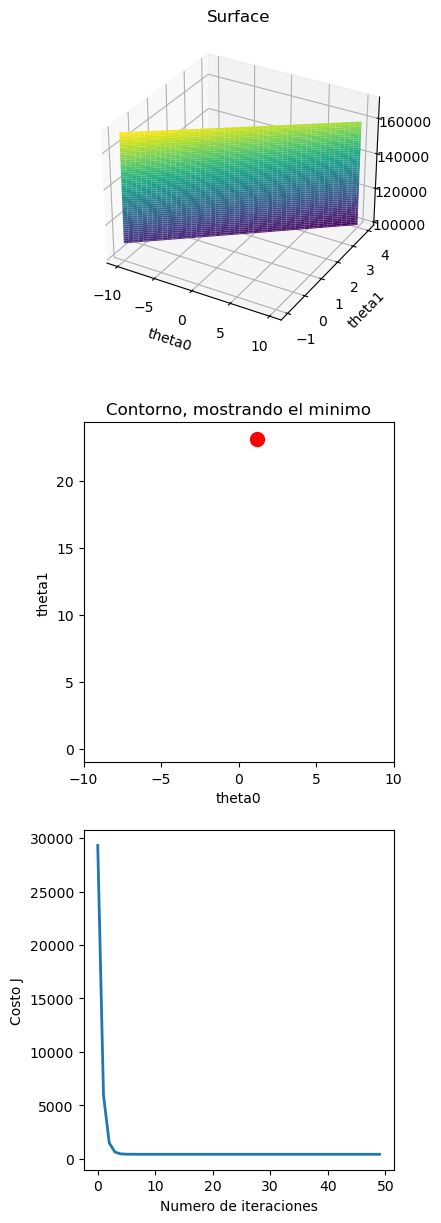

In [387]:
# cuadrícula sobre la que se calcula J
theta0_vals = np.linspace(-10, 10, 100)
theta1_vals = np.linspace(-1, 4, 100)

# inicializa J_vals con una matriz de 0's
J_vals = np.zeros((theta0_vals.shape[0], theta1_vals.shape[0]))

# Completar J_vals
for i, theta0 in enumerate(theta0_vals):
    for j, theta1 in enumerate(theta1_vals):
        J_vals[i, j] = calcularCosto(X, y, [theta0, theta1])

# Debido a la forma en que funcionan las cuadrículas en el comando surf,
# se necesita transponer J_vals antes de llamar a surf, o de lo contrario los ejes se invertirán
J_vals = J_vals.T

# graficar la superficie
fig = pyplot.figure(figsize=(4, 15))
ax = fig.add_subplot(311, projection='3d')
ax.plot_surface(theta0_vals, theta1_vals, J_vals, cmap='viridis')
pyplot.xlabel('theta0')
pyplot.ylabel('theta1')
pyplot.title('Surface')

# graficar contornos
# Grafica J_vals como 15 contours spaciados logaritmicamente entre 0.01 y 100
ax = pyplot.subplot(312)
pyplot.contour(theta0_vals, theta1_vals, J_vals, linewidths=2, cmap='viridis', levels=np.logspace(-2, 3, 20))
pyplot.xlabel('theta0')
pyplot.ylabel('theta1')
pyplot.plot(theta[0], theta[1], 'ro', ms=10, lw=2)
pyplot.title('Contorno, mostrando el minimo')


# Grafica la convergencia del costo
ax = pyplot.subplot(313)
pyplot.plot(np.arange(len(J_history)), J_history, lw=2)
pyplot.xlabel('Numero de iteraciones')
pyplot.ylabel('Costo J')

pass